# Machine Learning Assignment 2

Muhammad Ghulam Abbas (29417) and Muhammad Adnan Ali(29401)

This project analyze the effects of different techniques on the performance of machine learning models for regression and classification tasks using four datasets. The analysis focuses on evaluating the impact of cross-validation and feature selection methods, including filter, wrapper, and PCA.

# k Nearest Neighbours

In this project, I build a k Nearest Neighbours classifier to classify the Dry Beans Data Set.

# Dataset Description

The attribute information of this dataset is as follows:-
1. Area
2. Perimeter
3. MajorAxisLength
4. MinorAxisLength
5. AspectRation
6. Eccentricity
7. ConvexArea
8. EquivDiameter
9. Extent
10. Solidity
11. roundness
12. Compactness
13. ShapeFactor1
14. ShapeFactor2
15. ShapeFactor3
16. ShapeFactor4
17. Class

# Import packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the CSV file into a pandas DataFrame
file_path = "Dry_Bean_Dataset.xlsx"
df= pd.read_excel(file_path)

df_orig = df.copy()

In [3]:
df.shape


(13611, 17)

In [4]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


# Data cleaning


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [6]:
df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

The Class column is categorical, whereas the remaining columns contain continuous values.

In [7]:
df.isna().sum()


Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

As we can see, the dataset has no missing values

# Drop redundant columns
We should drop any redundant columns from the dataset which does not have any predictive power. Here we are not dropping any columns.

In [8]:
df['Class'].value_counts()


Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

In [9]:
round(df['Class'].value_counts()*100/df['Class'].value_counts().sum(), 2)


Class
DERMASON    26.05
SIRA        19.37
SEKER       14.89
HOROZ       14.17
CALI        11.98
BARBUNYA     9.71
BOMBAY       3.84
Name: count, dtype: float64

# Exploratory Data Analysis
 

<Axes: xlabel='Class', ylabel='count'>

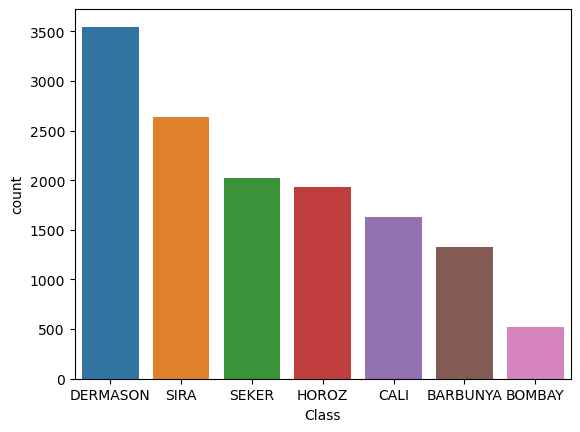

In [10]:
# Sorted by row count by Class 
sns.countplot(x = 'Class', data = df, order = df['Class'].value_counts().index)

There are multiple classes in the data and data is imbalanced.

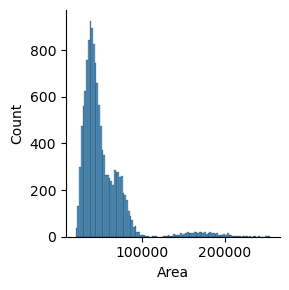

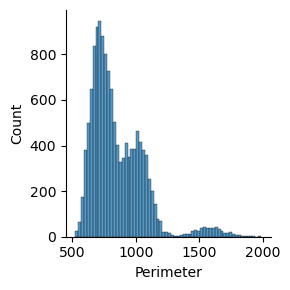

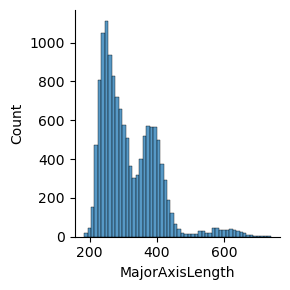

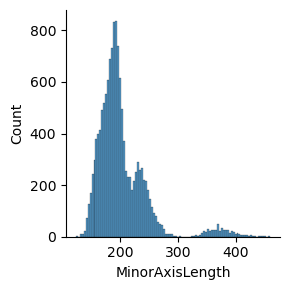

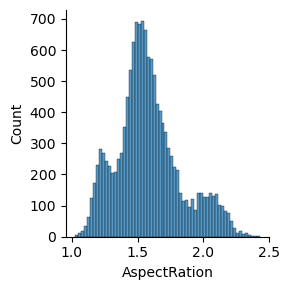

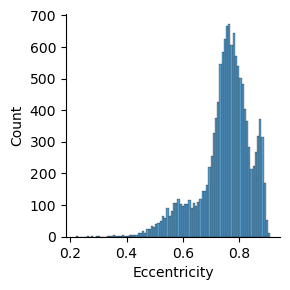

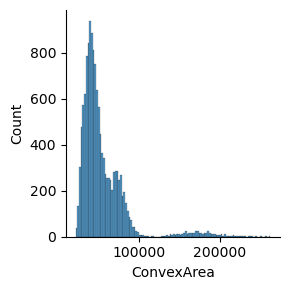

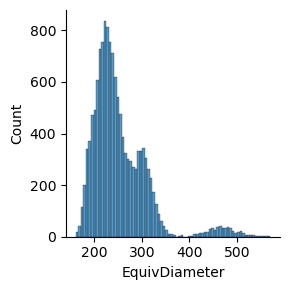

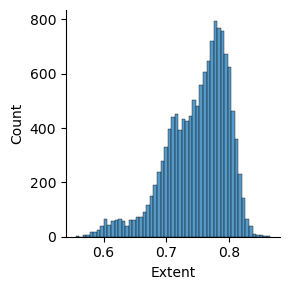

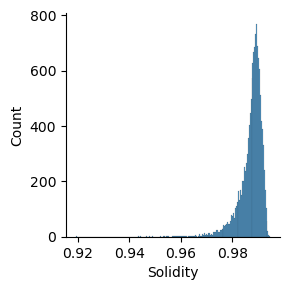

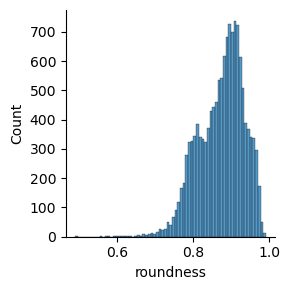

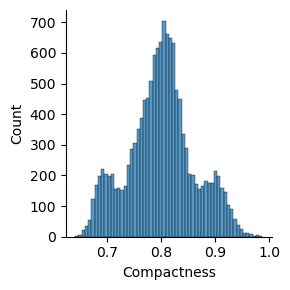

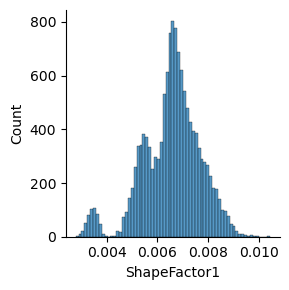

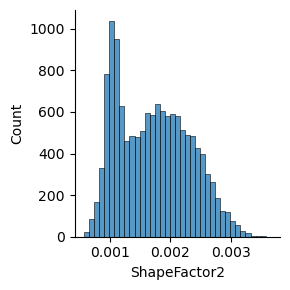

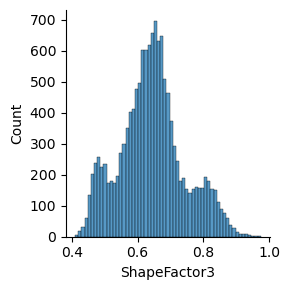

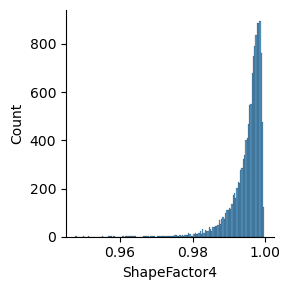

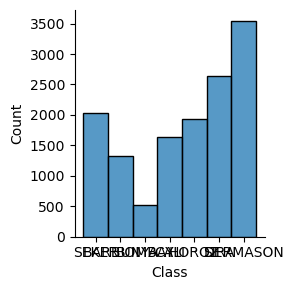

In [11]:
for column in df:
  sns.displot(x=column, data=df, height=3, aspect=1)

##### Inference about distribution: 
Most of the features are right skewed

Area, Perimeter, MajorAxisLength, MinorAxisLength, AspectRation, ConvexArea, EquivDiameter, ShapeFactor2, ShapeFactor3

A few features are left skewed

Eccentricity, Extent, Solidity, roundness, ShapeFactor4

Two features are not skewed 

Compactness, ShapeFactor1



In [13]:
df.describe().T[['mean','50%']]


,mean,50%
Area,53048.284549,44652.000000
Perimeter,855.283459,794.941000
MajorAxisLength,320.141867,296.883367
MinorAxisLength,202.270714,192.431733
AspectRation,1.583242,1.551124
Eccentricity,0.750895,0.764441
ConvexArea,53768.200206,45178.000000
EquivDiameter,253.064220,238.438026
Extent,0.749733,0.759859
Solidity,0.987143,0.988283


# CORRELATION:-


In [14]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder= LabelEncoder()
df['Class'] = Label_Encoder.fit_transform(df['Class'])

In [15]:
df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class                int32
dtype: object

In [16]:
corr = df.corr()
corr_values = corr['Class'].sort_values().round(3)
corr_values

Perimeter         -0.508
EquivDiameter     -0.481
ConvexArea        -0.477
Area              -0.475
MinorAxisLength   -0.458
MajorAxisLength   -0.455
Eccentricity      -0.200
AspectRation      -0.116
Extent            -0.031
Compactness        0.156
ShapeFactor4       0.165
ShapeFactor3       0.168
Solidity           0.321
ShapeFactor2       0.335
roundness          0.385
ShapeFactor1       0.392
Class              1.000
Name: Class, dtype: float64

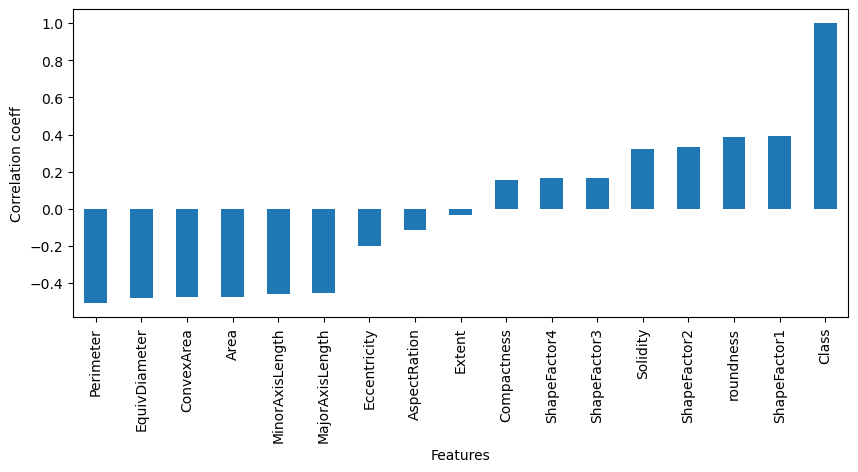

In [17]:
plt.figure(figsize=(10,4))
corr_values.plot.bar()
plt.xlabel('Features')
plt.ylabel('Correlation coeff')
plt.show()

In [18]:
corr.round(2)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
Area,1.00,0.97,0.93,0.95,0.24,0.27,1.00,0.98,0.05,-0.20,-0.36,-0.27,-0.85,-0.64,-0.27,-0.36,-0.48
Perimeter,0.97,1.00,0.98,0.91,0.39,0.39,0.97,0.99,-0.02,-0.30,-0.55,-0.41,-0.86,-0.77,-0.41,-0.43,-0.51
MajorAxisLength,0.93,0.98,1.00,0.83,0.55,0.54,0.93,0.96,-0.08,-0.28,-0.60,-0.57,-0.77,-0.86,-0.57,-0.48,-0.46
MinorAxisLength,0.95,0.91,0.83,1.00,-0.01,0.02,0.95,0.95,0.15,-0.16,-0.21,-0.02,-0.95,-0.47,-0.02,-0.26,-0.46
AspectRation,0.24,0.39,0.55,-0.01,1.00,0.92,0.24,0.30,-0.37,-0.27,-0.77,-0.99,0.02,-0.84,-0.98,-0.45,-0.12
Eccentricity,0.27,0.39,0.54,0.02,0.92,1.00,0.27,0.32,-0.32,-0.30,-0.72,-0.97,0.02,-0.86,-0.98,-0.45,-0.20
ConvexArea,1.00,0.97,0.93,0.95,0.24,0.27,1.00,0.99,0.05,-0.21,-0.36,-0.27,-0.85,-0.64,-0.27,-0.36,-0.48
EquivDiameter,0.98,0.99,0.96,0.95,0.30,0.32,0.99,1.00,0.03,-0.23,-0.44,-0.33,-0.89,-0.71,-0.33,-0.39,-0.48
Extent,0.05,-0.02,-0.08,0.15,-0.37,-0.32,0.05,0.03,1.00,0.19,0.34,0.35,-0.14,0.24,0.35,0.15,-0.03
Solidity,-0.20,-0.30,-0.28,-0.16,-0.27,-0.30,-0.21,-0.23,0.19,1.00,0.61,0.30,0.15,0.34,0.31,0.70,0.32


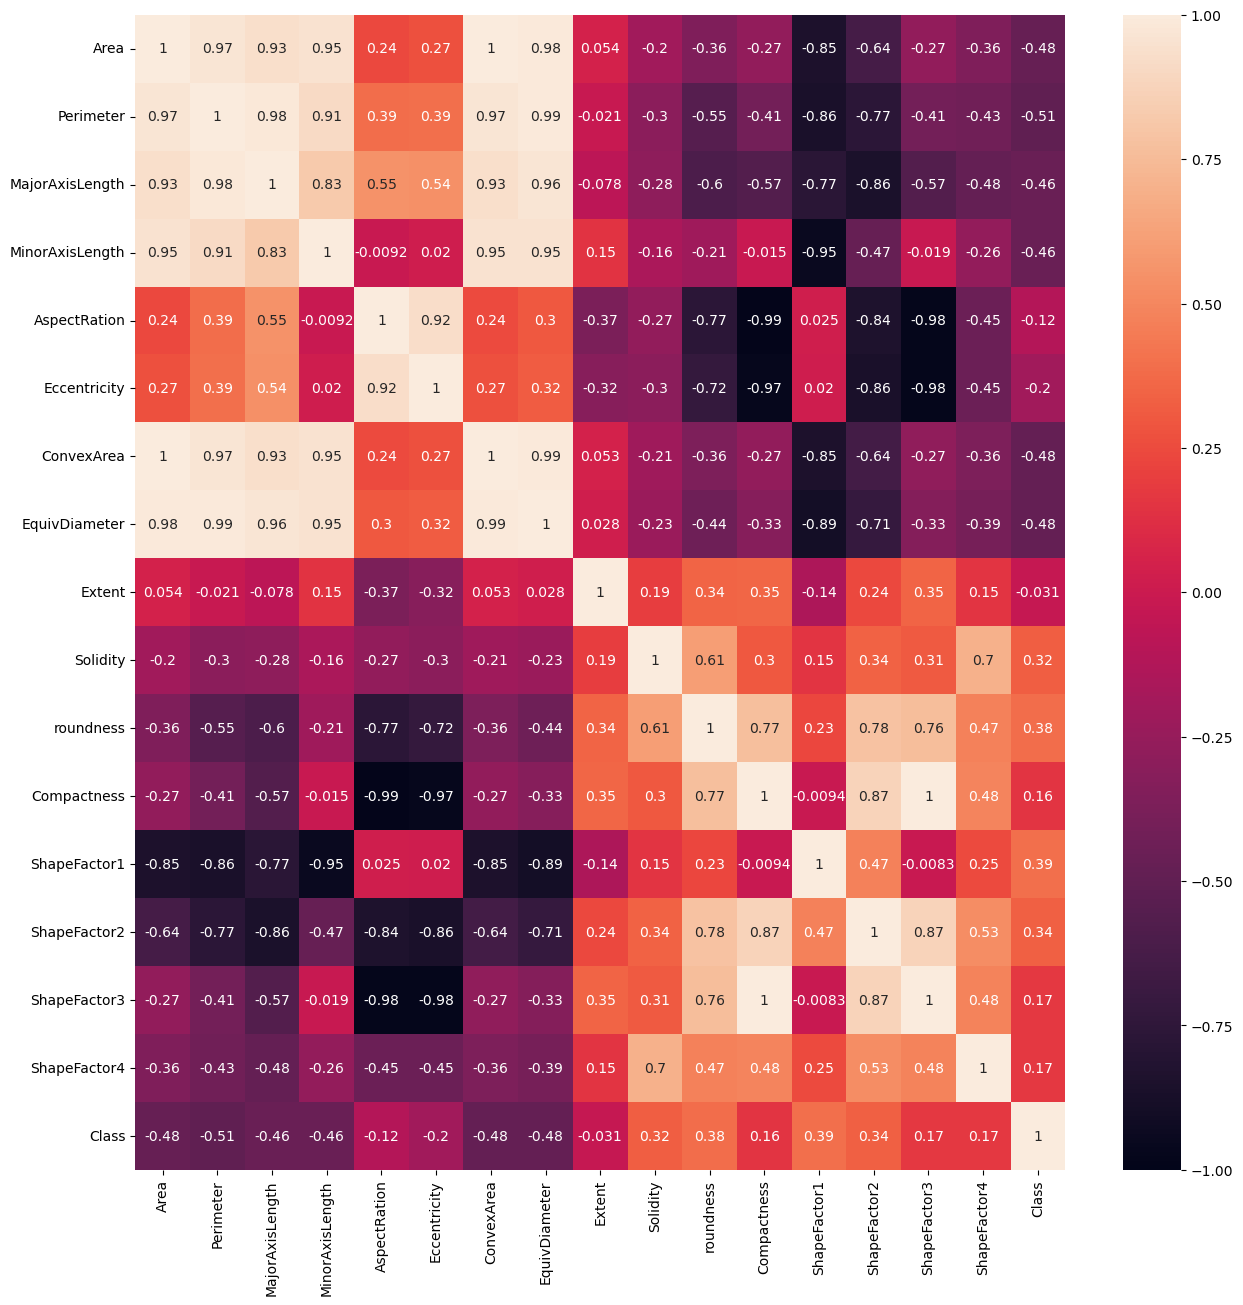

In [20]:
import seaborn as sns
import matplotlib
import matplotlib.pylab as plt
plt.figure(figsize =(15,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

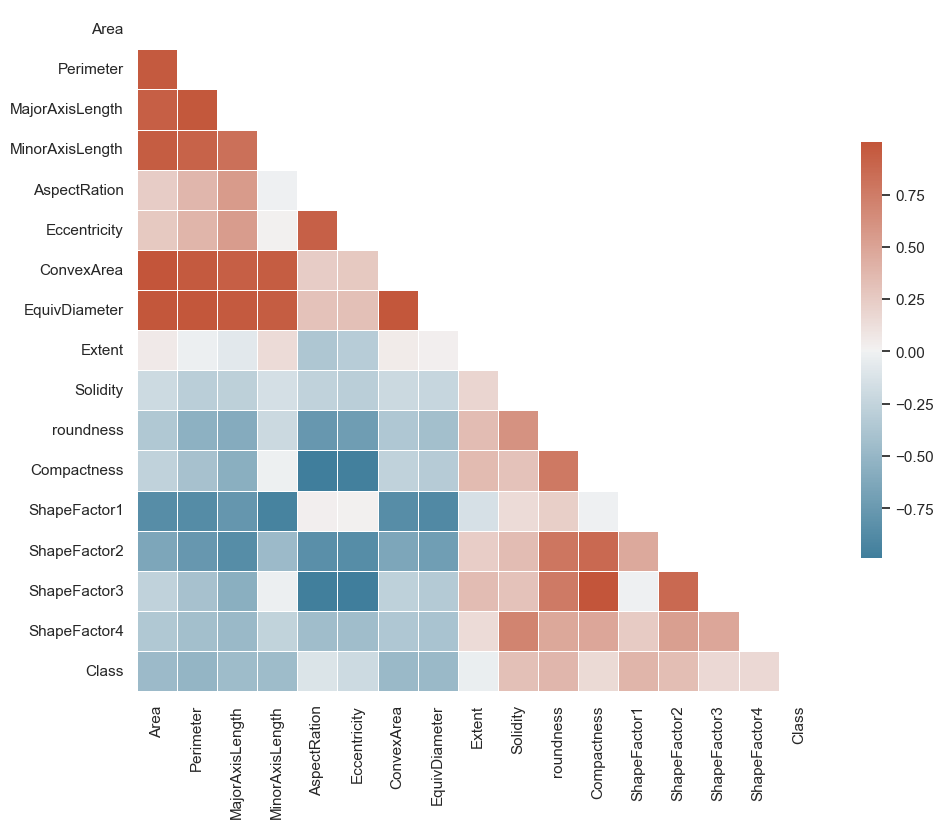

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="white")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .6})
plt.show()



In [24]:
corr

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721,-0.475252
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310,-0.507638
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527,-0.455175
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749,-0.458492
AspectRation,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264,-0.116332
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354,-0.200356
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049,-0.477459
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512,-0.481099
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502,-0.031184
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163,0.321283


Area, Perimeter, MajorAxisLength, MinorAxisLength, ConvexArea, EquivDiameter are highy correlated

Compactness, ShapeFactor3 are highly correlated

Compactness, ShapeFactor3 are negatively correlated to AspectRation, Eccentricity

ShapeFactor1, ShapeFactor2 are negatively correlated to Area, Perimeter, MajorAxisLength, MinorAxisLength, ConvexArea, EquivDiameter



# Detecting outliers and anomalies


In [26]:

def identify_outliers(df):
    outliers_dict = {}
    for column_name in df.columns:     
        q25, q75 = np.percentile(df[column_name], 25), np.percentile(df[column_name], 75)
        iqr = q75 - q25
        cut_off = iqr * 1.5
        lower, upper = q25 - cut_off, q75 + cut_off
        outliers = [x for x in df[column_name] if x < lower or x > upper]
        outliers_dict[column_name] = len(outliers)
    return outliers_dict

# Example usage:
# Assuming df is your DataFrame
outliers_info = identify_outliers(df)
print("Number of outliers in each column:")

pd.DataFrame.from_dict(outliers_info, orient='index').sort_values(0,ascending=False)

Number of outliers in each column:


,0
Eccentricity,843
Solidity,778
ShapeFactor4,767
MinorAxisLength,569
Area,551
ConvexArea,550
ShapeFactor1,533
EquivDiameter,526
Perimeter,500
AspectRation,473


The feature with the highest number of outliers is 'Eccentricity', with 843 outliers.

The feature with the lowest number of outliers is 'ShapeFactor2', with 0 outliers.

# Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [28]:
scaled_data

array([[-0.84074853, -1.1433189 , -1.30659814, ...,  1.92572347,
         0.83837103,  0.80242218],
       [-0.82918764, -1.01392388, -1.39591111, ...,  2.68970162,
         0.77113842,  0.80242218],
       [-0.80715717, -1.07882906, -1.25235661, ...,  1.84135576,
         0.91675514,  0.80242218],
       ...,
       [-0.37203825, -0.44783294, -0.45047814, ...,  0.33632829,
         0.39025114, -0.29128584],
       [-0.37176543, -0.42702856, -0.42897404, ...,  0.2489734 ,
         0.03644001, -0.29128584],
       [-0.37135619, -0.38755718, -0.2917356 , ..., -0.2764814 ,
         0.71371948, -0.29128584]])

# Model Selection


In [ ]:
'''
#import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
# Split data into features (X) and target (y)

for Class_curr in Class_List:
    X = df.drop(columns=Class_List)
    y = df[Class_curr]

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize LazyClassifier
    clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
    models_train, predictions_train = clf.fit(X_train, X_train, y_train, y_train)
    models_test, predictions_test = clf.fit(X_train, X_test, y_train, y_test)

    # Print the models and their accuracy on the test set
    print('Accuracy results for ',Class_curr)
    print(models_test)
'''

# Model Training Before Cross Validation


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
X = df.drop('Class', axis=1)

y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model to the training set
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7349


In [31]:
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

In [32]:
print("Precision for each class:", precision)
print("Recall for each class:", recall)
print("F1-score for each class:", f1)

Precision for each class: [0.4602649  1.         0.67912773 0.82663317 0.76331361 0.80781759
 0.68430335]
Recall for each class: [0.54509804 1.         0.62285714 0.8952381  0.66153846 0.65957447
 0.73904762]
F1-score for each class: [0.49910233 1.         0.64977645 0.85956891 0.70879121 0.72620791
 0.71062271]


In [33]:
accuracy = accuracy_score(y_test, y_pred)
print('Overall accuracy:', accuracy)

Overall accuracy: 0.7348512669849431


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.55      0.50       255
           1       1.00      1.00      1.00        92
           2       0.68      0.62      0.65       350
           3       0.83      0.90      0.86       735
           4       0.76      0.66      0.71       390
           5       0.81      0.66      0.73       376
           6       0.68      0.74      0.71       525

    accuracy                           0.73      2723
   macro avg       0.75      0.73      0.74      2723
weighted avg       0.74      0.73      0.73      2723



# Model Training After Cross Validation


----------------------------------------------------------------

Calculated Scores for K neighborhood value 10, KFold (cv) value 10 :

  [0.2958884  0.31153564 0.2373255  0.19250551 0.10727406 0.10066128
 0.09037472 0.07127112 0.05657605 0.15870683]

----------------------------------------------------------------

Avarage Trust : 0.16221191121238704

----------------------------------------------------------------

Average error rate:  0.837788088787613

----------------------------------------------------------------

Sensitivity :  16.221

----------------------------------------------------------------

Specificity :  29.363000000000003

----------------------------------------------------------------

Average scores achieved for K between 1 and 20: 

  [0.1439897997606925, 0.1571419477558718, 0.16221191121238704, 0.1730128468637015, 0.17462925140342303, 0.1752171084360748, 0.17551084813900117, 0.177862060482866, 0.1788906619366213, 0.18697295436865655, 0.18800155582241182, 0.188

Text(0.5, 1.0, 'Observing the best value for K')

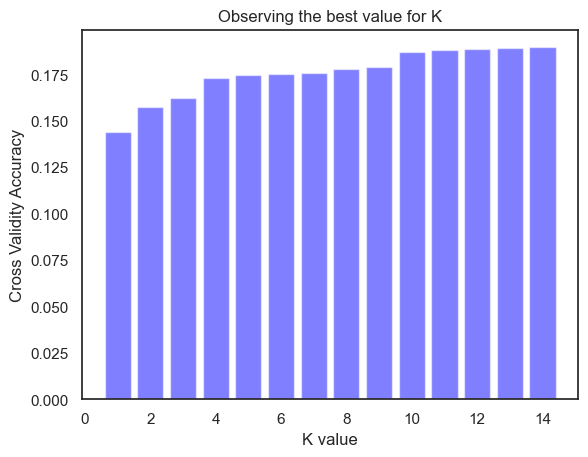

In [35]:
from sklearn.model_selection import cross_val_score
skor = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
#calculation of sensitivity 
Rscores= cross_val_score(knn, X, y, cv=10, scoring='recall_weighted')
sensitivity=round((Rscores.mean()*100),3)


#calculation of balanced_accuracy 
Sscores= cross_val_score(knn, X, y, cv=10, scoring='balanced_accuracy')
balanced_accuracy=round((Sscores.mean()*100),3)


print("\n----------------------------------------------------------------")
print("\nCalculated Scores for K neighborhood value 10, KFold (cv) value 10 :\n\n ",skor)
print("\n----------------------------------------------------------------")
print("\nAvarage Trust :", skor.mean())
print("\n----------------------------------------------------------------")
print("\nAverage error rate: ",1-skor.mean())
print("\n----------------------------------------------------------------")
print("\nSensitivity : ",sensitivity)
print("\n----------------------------------------------------------------")
print("\nSpecificity : ",balanced_accuracy*2-sensitivity )
print("\n----------------------------------------------------------------")

# We compute the values for the k values in the range
k_range = range(1, 15)
k_scores = []

for k in k_range:
	knn = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
	#Up to 10 kfold is applied
 #The average value in each fold operation is kept in k_scores
	skor = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
	k_scores.append(skor.mean())
print("\nAverage scores achieved for K between 1 and 20: \n\n ",k_scores)

# To display the best K number, we give K values from 1 to 10 and plot the results on the graph.
plt.bar(k_range,k_scores,color='blue',align='center', alpha=0.5)
plt.xlabel('K value')
plt.ylabel('Cross Validity Accuracy')
plt.title('Observing the best value for K')


In [36]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Instantiate the model with a specific K value
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training set
knn.fit(X_train, y_train)

# Evaluate accuracy on the test set before cross-validation
y_pred_test = knn.predict(X_test)
accuracy_before_cv = accuracy_score(y_test, y_pred_test)
print("Accuracy before cross-validation:", accuracy_before_cv)

# Perform cross-validation to evaluate model accuracy
skor_cv = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

# Calculate mean accuracy after cross-validation
accuracy_after_cv = skor_cv.mean()
print("Accuracy after cross-validation:", accuracy_after_cv)


Accuracy before cross-validation: 0.7348512669849431
Accuracy after cross-validation: 0.16221191121238704


The results show that the accuracy of the K-nearest neighbors (KNN) model degraded after performing cross-validation.

Accuracy before cross-validation: The accuracy of the KNN model when evaluated on the separate test set before cross-validation is approximately 73.48%. This indicates that when the model was trained on a portion of the data and tested on a separate unseen portion, it achieved an accuracy of about 73.48%.

Accuracy after cross-validation: The accuracy of the KNN model when evaluated through cross-validation is approximately 16.22%. This value represents the average accuracy across multiple folds of cross-validation, where the model was trained and tested on different subsets of the data

# FEATURE SELECTION METHOD


# 1.FILTER METHOD:-

Variance Threshold

Variance thresholding is a technique used in feature selection to remove features with low variance from a dataset

In [39]:
variances = df.var()
variances.sort_values(ascending=False)


ConvexArea         8.865456e+08
Area               8.599026e+08
Perimeter          4.592007e+04
MajorAxisLength    7.343494e+03
EquivDiameter      3.501932e+03
MinorAxisLength    2.022309e+03
Class              3.344176e+00
AspectRation       6.085026e-02
ShapeFactor3       9.800238e-03
Eccentricity       8.464324e-03
Compactness        3.808552e-03
roundness          3.542617e-03
Extent             2.409471e-03
Solidity           2.171913e-05
ShapeFactor4       1.906595e-05
ShapeFactor1       1.272380e-06
ShapeFactor2       3.550668e-07
dtype: float64

In [40]:
#Setting Threshold Value  0.1
from sklearn.feature_selection import VarianceThreshold

def apply_variance_threshold(X_train, threshold=0.1):
    var_thres = VarianceThreshold(threshold=threshold)
    var_thres.fit(X_train)
    selected_features = X_train.columns[var_thres.get_support()]
    non_constant_features_count = sum(var_thres.get_support())
    constant_columns = [column for column in X_train.columns if column not in selected_features]
    print("Number of non-constant features:", non_constant_features_count)
    print("Constant columns removed:", constant_columns)
    print("Selected features:", selected_features)
    return X_train[selected_features]

In [41]:
X_train_filtered = apply_variance_threshold(X_train, threshold=0.1)
X_train_filtered

Number of non-constant features: 6
Constant columns removed: ['AspectRation', 'Eccentricity', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']
Selected features: Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea',
       'EquivDiameter'],
      dtype='object')


,Area,Perimeter,MajorAxisLength,MinorAxisLength,ConvexArea,EquivDiameter
2301,61576,938.472,339.967690,231.311007,62280,280.001783
5659,43099,815.390,328.234078,168.610116,43710,234.254885
8597,43877,781.020,290.108910,193.218426,44424,236.359750
6157,50975,894.842,369.469026,177.711350,51620,254.761429
4544,72900,1053.947,412.558658,228.073584,74237,304.662375
...,...,...,...,...,...,...
13123,37832,720.476,263.034496,183.384980,38289,219.474824
3264,85890,1152.016,417.536420,262.719645,87188,330.694035
9845,51131,842.796,316.185620,207.028992,51654,255.150958
10799,27884,630.303,239.405409,148.484842,28196,188.422428


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Updated selected features
selected = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'EquivDiameter']

X = df[selected]  # Use only selected features
y = df['Class']

def train_knn_and_evaluate(X, y, test_size=0.2, random_state=0, n_neighbors=3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)  # Generate classification report
    return accuracy, report  # Return accuracy and classification report

# Example usage:
accuracy, report = train_knn_and_evaluate(X, y)
print('Model accuracy score: {0:0.4f}'.format(accuracy))
print('Classification Report:\n', report)


Model accuracy score: 0.7349
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.55      0.50       255
           1       1.00      1.00      1.00        92
           2       0.68      0.62      0.65       350
           3       0.83      0.90      0.86       735
           4       0.76      0.66      0.71       390
           5       0.81      0.66      0.73       376
           6       0.68      0.74      0.71       525

    accuracy                           0.73      2723
   macro avg       0.75      0.73      0.74      2723
weighted avg       0.74      0.73      0.73      2723



it implies that the removal of features with low variance did not significantly affect the model predictive performance.

# CORRELATION

<Axes: >

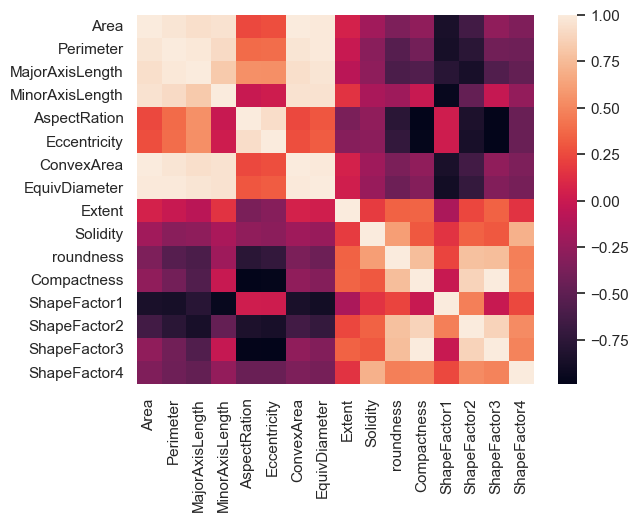

In [43]:
import seaborn as sns
sns.heatmap(X_train.corr())

In [44]:
def apply_pearson_correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    selected_features = [col for col in dataset.columns if col not in col_corr]
    return col_corr, selected_features

In [45]:
correlated_features, selected_features = apply_pearson_correlation(X_train, 0.5)
print("Number of correlated features:", len(correlated_features))
print("Number of selected features:", len(selected_features))
print("Correlated features:", correlated_features)
print("Selected features:", selected_features)

Number of correlated features: 13
Number of selected features: 3
Correlated features: {'EquivDiameter', 'MajorAxisLength', 'Perimeter', 'MinorAxisLength', 'roundness', 'ShapeFactor2', 'ShapeFactor1', 'Eccentricity', 'ShapeFactor4', 'Compactness', 'ShapeFactor3', 'ConvexArea', 'AspectRation'}
Selected features: ['Area', 'Extent', 'Solidity']


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Updated selected features
selected = ['Area', 'Extent', 'Solidity']

X = df[selected]  # Use only selected features
y = df['Class']

def train_knn_and_evaluate(X, y, test_size=0.2, random_state=0, n_neighbors=3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)  # Generate classification report
    return accuracy, report  # Return accuracy and classification report

# Example usage:
accuracy, report = train_knn_and_evaluate(X, y)
print('Model accuracy score: {0:0.4f}'.format(accuracy))
print('Classification Report:\n', report)


Model accuracy score: 0.5652
Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.33      0.31       255
           1       1.00      1.00      1.00        92
           2       0.61      0.59      0.60       350
           3       0.73      0.83      0.78       735
           4       0.49      0.50      0.49       390
           5       0.34      0.29      0.31       376
           6       0.53      0.46      0.50       525

    accuracy                           0.57      2723
   macro avg       0.57      0.57      0.57      2723
weighted avg       0.56      0.57      0.56      2723



our accuracy reduces after correlation it might happens because  some features may be correlated, they could still provide unique information that contributes to the models performance


# Information Gain

In [48]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest
import pandas as pd

def apply_mutual_information_classification(X_train, y_train, k=5):
    mutual_info = mutual_info_classif(X_train, y_train)
    mutual_info_series = pd.Series(mutual_info, index=X_train.columns)
    mutual_info_sorted = mutual_info_series.sort_values(ascending=False)
    mutual_info_sorted.plot.bar(figsize=(15, 8))
    sel_k_cols = SelectKBest(mutual_info_classif, k=k)
    sel_k_cols.fit(X_train, y_train)
    selected_features = X_train.columns[sel_k_cols.get_support()]
    return mutual_info_sorted, selected_features

Mutual Information sorted: Perimeter          1.063120
EquivDiameter      1.038373
Area               1.037715
ConvexArea         1.036469
MajorAxisLength    0.990274
ShapeFactor2       0.954596
ShapeFactor1       0.932759
MinorAxisLength    0.927195
ShapeFactor3       0.836337
Compactness        0.836336
AspectRation       0.814040
Eccentricity       0.813988
roundness          0.800185
ShapeFactor4       0.364230
Solidity           0.240800
Extent             0.205088
dtype: float64
Selected features: Index(['Area', 'Perimeter', 'MajorAxisLength', 'ConvexArea', 'EquivDiameter'], dtype='object')


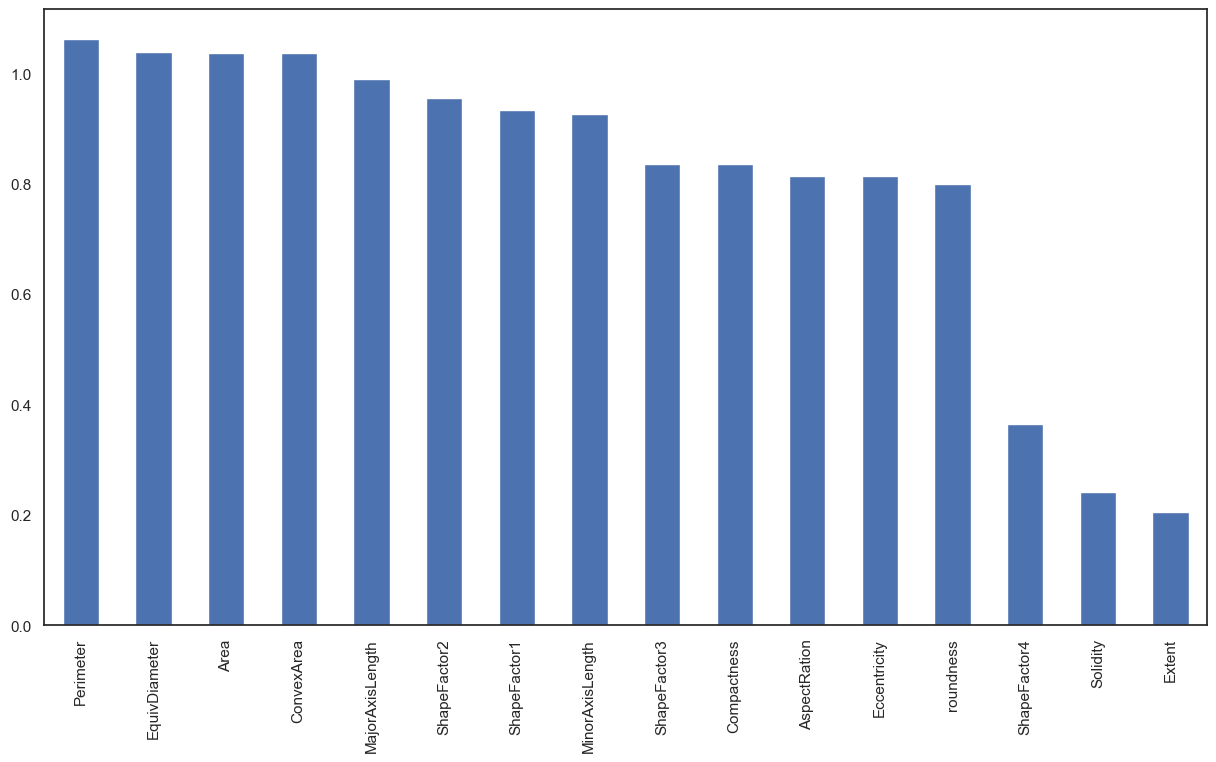

In [49]:
mutual_info_sorted, selected_features = apply_mutual_information_classification(X_train, y_train, k=5)
print("Mutual Information sorted:", mutual_info_sorted)
print("Selected features:", selected_features)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

selected = ['Area', 'Perimeter', 'MajorAxisLength', 'ConvexArea', 'EquivDiameter']

X = df[selected]
y = df['Class']

def train_knn_and_evaluate(X, y, test_size=0.2, random_state=0, n_neighbors=3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)  # Generate classification report
    return accuracy, report

# Example usage:
accuracy, report = train_knn_and_evaluate(X, y)
print('Model accuracy score: {0:0.4f}'.format(accuracy))
print('Classification Report:\n', report)



Model accuracy score: 0.7198
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.54      0.49       255
           1       1.00      1.00      1.00        92
           2       0.68      0.62      0.65       350
           3       0.81      0.88      0.85       735
           4       0.75      0.65      0.69       390
           5       0.76      0.62      0.68       376
           6       0.68      0.72      0.70       525

    accuracy                           0.72      2723
   macro avg       0.73      0.72      0.72      2723
weighted avg       0.72      0.72      0.72      2723



The accuracy before applying information gain-based feature selection was 0.7349.

After feature selection using information gain, the model accuracy decreased to 0.7198.

This degradation suggests that the selected features based on information gain were less relevant and informative for the classification task.

#  chi-square test

The Chi-square test is suitable only for categorical attributes. Since our data comprises numerical variables, using the Chi-square test may yield inaccurate results. Therefore, it would be prudent to opt for the ANOVA test, which is better suited for numerical data analysis and is expected to provide more accurate and reliable results.

In [52]:
from sklearn.feature_selection import chi2
import pandas as pd

def apply_chi_square_test(X_train, y_train):
    # Perform chi2 test
    f_score, p_values = chi2(X_train, y_train)
    
    # Create a pandas Series for p-values
    p_values_series = pd.Series(p_values, index=X_train.columns)
    
    # Sort p-values in descending order
    p_values_sorted = p_values_series.sort_values(ascending=False)
    
    return p_values_sorted

# Example usage:
sorted_p_values = apply_chi_square_test(X_train, y_train)
print("Sorted p-values:", sorted_p_values)

Sorted p-values: Solidity           9.999970e-01
ShapeFactor4       9.999921e-01
ShapeFactor1       9.377483e-01
ShapeFactor2       9.279910e-01
Extent             4.790794e-01
roundness          1.303140e-05
Compactness        1.399719e-07
Eccentricity       1.146669e-18
ShapeFactor3       8.827655e-27
AspectRation       1.353115e-71
Area               0.000000e+00
Perimeter          0.000000e+00
MajorAxisLength    0.000000e+00
MinorAxisLength    0.000000e+00
ConvexArea         0.000000e+00
EquivDiameter      0.000000e+00
dtype: float64


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

selected_columns = ['Solidity','ShapeFactor4','ShapeFactor1','ShapeFactor2','Extent',
                    'roundness','Compactness','Eccentricity','ShapeFactor3','AspectRation']

X = df[selected_columns]
y = df['Class']

def train_knn_and_evaluate(X, y, test_size=0.2, random_state=0, n_neighbors=3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)  # Generate classification report
    return accuracy, report

# Example usage:
accuracy, report = train_knn_and_evaluate(X, y)
print('Model accuracy score: {0:0.4f}'.format(accuracy))
print('Classification Report:\n', report)


Model accuracy score: 0.6820
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.82      0.75       255
           1       0.24      0.29      0.26        92
           2       0.59      0.62      0.61       350
           3       0.69      0.67      0.68       735
           4       0.93      0.87      0.90       390
           5       0.89      0.87      0.88       376
           6       0.49      0.46      0.47       525

    accuracy                           0.68      2723
   macro avg       0.65      0.66      0.65      2723
weighted avg       0.69      0.68      0.68      2723



The decrease in model accuracy from 0.7348 to 0.6820 after performing the Chi-square test on numerical attributes suggests that utilizing this test on such data negatively impacted the models predictive performance because it is primarily designed for categorical attributes and loses information.

# ANOVA TEST

In [54]:
from sklearn.feature_selection import f_classif, SelectKBest
import numpy as np
import pandas as pd

def apply_anova_feature_selection(X, y, k=5):
    fs = SelectKBest(score_func=f_classif, k=k)
    fs.fit(X, y)
    support = fs.get_support()
    num_selected_features = support.sum()
    feature_score = pd.DataFrame({
        "Input_Features": X.columns,
        "Score": fs.scores_,
        "P_Value": np.round(fs.pvalues_, 4)
    })
    top_features = feature_score.nlargest(k, columns="Score")
    selected_features = top_features["Input_Features"].tolist()  # Extract selected feature names
    return support, num_selected_features, selected_features

# Example usage:
support, num_selected_features, selected_features = apply_anova_feature_selection(X, y, k=10)
print("Support:", support)
print("Number of selected features:", num_selected_features)
print("Selected features:", selected_features)


Support: [ True  True  True  True  True  True  True  True  True  True]
Number of selected features: 10
Selected features: ['ShapeFactor2', 'ShapeFactor1', 'AspectRation', 'Compactness', 'ShapeFactor3', 'Eccentricity', 'roundness', 'ShapeFactor4', 'Solidity', 'Extent']


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Selected features
selected_features = ['ShapeFactor2', 'ShapeFactor1', 'AspectRation', 'Compactness', 'ShapeFactor3', 
                     'Eccentricity', 'roundness', 'ShapeFactor4', 'Solidity', 'Extent']

X = df[selected_features]
y = df['Class']

def train_knn_and_evaluate(X, y, test_size=0.2, random_state=0, n_neighbors=3):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Initialize KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Train the classifier
    knn.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Generate classification report
    report = classification_report(y_test, y_pred)
    
    return accuracy, report

# Example usage:
accuracy, report = train_knn_and_evaluate(X, y)
print('Model accuracy score: {0:0.4f}'.format(accuracy))
print('Classification Report:\n', report)


Model accuracy score: 0.6820
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.82      0.75       255
           1       0.24      0.29      0.26        92
           2       0.59      0.62      0.61       350
           3       0.69      0.67      0.68       735
           4       0.93      0.87      0.90       390
           5       0.89      0.87      0.88       376
           6       0.49      0.46      0.47       525

    accuracy                           0.68      2723
   macro avg       0.65      0.66      0.65      2723
weighted avg       0.69      0.68      0.68      2723



The decrease in model accuracy from 0.7348 to 0.6820 after performing feature selection using the ANOVA test with k=10 suggests that the selected subset of features might not adequately capture the underlying patterns in the data for accurate classification.

# 2.WRAPPER METHOD

# FORWARD FEATURE SELECTION

In [57]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector

def forward_feature_selection(X_train, y_train, k_features=6, cv=5, scoring='accuracy'):
   
    clf = RandomForestClassifier(n_jobs=-1)

    forward_feature_selector = SequentialFeatureSelector(clf,
                                                         k_features=k_features,
                                                         forward=True,
                                                         floating=False,
                                                         scoring=scoring,
                                                         cv=cv)

    forward_feature_selector.fit(X_train, y_train)

    selected_feature_names = forward_feature_selector.k_feature_names_

    selected_score = forward_feature_selector.k_score_

    return selected_feature_names, selected_score


In [58]:
selected_names, score = forward_feature_selection(X_train, y_train)
print("Selected Feature Names:", selected_names)
print("Score of Selected Features:", score)

Selected Feature Names: ('Perimeter', 'AspectRation', 'Solidity', 'roundness', 'ShapeFactor2', 'ShapeFactor4')
Score of Selected Features: 0.9238604780843893


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the selected features
selected_features = ['Perimeter', 'AspectRation', 'Solidity', 'roundness', 'ShapeFactor2', 'ShapeFactor4']

# Extract feature matrix X and target vector y from your dataset
X = df[selected_features]
y = df['Class']
def train_knn_and_evaluate(X, y, test_size=0.2, random_state=0, n_neighbors=3):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Initialize KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Train the classifier
    knn.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Generate classification report
    report = classification_report(y_test, y_pred)
    
    return accuracy, report

# Example usage:
accuracy, report = train_knn_and_evaluate(X, y)
print('Model accuracy score: {0:0.4f}'.format(accuracy))
print('Classification Report:\n', report)



Model accuracy score: 0.7903
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.46      0.49       255
           1       1.00      0.98      0.99        92
           2       0.63      0.72      0.67       350
           3       0.88      0.91      0.89       735
           4       0.87      0.76      0.81       390
           5       0.90      0.81      0.85       376
           6       0.74      0.81      0.77       525

    accuracy                           0.79      2723
   macro avg       0.79      0.78      0.78      2723
weighted avg       0.79      0.79      0.79      2723



The accuracy of the model improved from 73.48% to 79.03% after we picked out the most important features. This means that by focusing on these key features, the model became better at getting predictions right. 
Its analogous to focusing on the most relevant information in a task, which helps us perform better overall. So, selecting the right features made our model more accurate in its predictions.

# BACKWARD FEATURE SELECTION

In [60]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector

def backward_feature_selection(X_train, y_train, num_features=8, cv=5, scoring='accuracy'):
    clf = RandomForestClassifier(n_jobs=-1)
    feature_selector = SequentialFeatureSelector(clf,
                                                 k_features=num_features,
                                                 forward=False,
                                                 floating=False,
                                                 scoring=scoring,
                                                 cv=cv)
    feature_selector.fit(X_train, y_train)
    selected_features = feature_selector.k_feature_names_
    selected_score = feature_selector.k_score_
    return selected_features, selected_score

selected_features, score = backward_feature_selection(X_train, y_train)
print("Selected Features:", selected_features)
print("Score of Selected Features:", score)


Selected Features: ('MajorAxisLength', 'AspectRation', 'Eccentricity', 'Extent', 'Solidity', 'roundness', 'ShapeFactor3', 'ShapeFactor4')
Score of Selected Features: 0.9246871774495276


In [61]:
selected_features = ['MajorAxisLength', 'AspectRation', 'Eccentricity', 
                     'Extent', 'Solidity', 'roundness', 'ShapeFactor3', 'ShapeFactor4']
X = df[selected_features]
y = df['Class']
def train_knn_and_evaluate(X, y, test_size=0.2, random_state=0, n_neighbors=3):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Initialize KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Train the classifier
    knn.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Generate classification report
    report = classification_report(y_test, y_pred)
    
    return accuracy, report

# Example usage:
accuracy, report = train_knn_and_evaluate(X, y)
print('Model accuracy score: {0:0.4f}'.format(accuracy))
print('Classification Report:\n', report)


Model accuracy score: 0.8355
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.62      0.66       255
           1       1.00      0.95      0.97        92
           2       0.76      0.82      0.79       350
           3       0.88      0.90      0.89       735
           4       0.93      0.83      0.88       390
           5       0.92      0.88      0.90       376
           6       0.75      0.81      0.78       525

    accuracy                           0.84      2723
   macro avg       0.85      0.83      0.84      2723
weighted avg       0.84      0.84      0.84      2723



The accuracy of the model improved from 73.48% to 83.55% after we picked out the most important features using backward feature selection. This means that by focusing on these key features, the model became better at getting predictions right. 
Its analogous to focusing on the most relevant information in a task, which helps us perform better overall. So, selecting the right features made our model more accurate in its predictions.

Forward feature selection selected 6 features while backward feature selection identified 8 features. The accuracy of backward selection is better than forward selection implying there is some combined predictive power in combination of features.

In [62]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

def recursive_feature_elimination(X, y, estimator, n_features_to_select):
    rfe = RFE(estimator=estimator, n_features_to_select=n_features_to_select)
    rfe.fit(X, y)
    selected_features = [col for i, col in zip(range(X.shape[1]), X.columns) if rfe.support_[i]]
    feature_rankings = {col: rank for col, rank in zip(X.columns, rfe.ranking_)}
    return selected_features, feature_rankings


In [63]:
selected_features, feature_rankings = recursive_feature_elimination(X, y, estimator=DecisionTreeClassifier(), n_features_to_select=5)
print("Selected features:", selected_features)
print("Feature rankings:", feature_rankings)

Selected features: ['MajorAxisLength', 'AspectRation', 'roundness', 'ShapeFactor3', 'ShapeFactor4']
Feature rankings: {'MajorAxisLength': 1, 'AspectRation': 1, 'Eccentricity': 4, 'Extent': 3, 'Solidity': 2, 'roundness': 1, 'ShapeFactor3': 1, 'ShapeFactor4': 1}


In [64]:

selected_features = ['MajorAxisLength', 'AspectRation', 'roundness', 'ShapeFactor3', 'ShapeFactor4']
X = df[selected_features]
y = df['Class']
def train_knn_and_evaluate(X, y, test_size=0.2, random_state=0, n_neighbors=3):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Initialize KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Train the classifier
    knn.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Generate classification report
    report = classification_report(y_test, y_pred)
    
    return accuracy, report

# Example usage:
accuracy, report = train_knn_and_evaluate(X, y)
print('Model accuracy score: {0:0.4f}'.format(accuracy))
print('Classification Report:\n', report)

Model accuracy score: 0.8355
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.60      0.64       255
           1       1.00      0.95      0.97        92
           2       0.75      0.81      0.78       350
           3       0.88      0.91      0.90       735
           4       0.93      0.83      0.88       390
           5       0.93      0.87      0.90       376
           6       0.75      0.82      0.78       525

    accuracy                           0.84      2723
   macro avg       0.85      0.83      0.84      2723
weighted avg       0.84      0.84      0.84      2723



The increase in accuracy from 73.48% to 83.55% after using Recursive Feature Elimination (RFE) suggests that RFE has effectively selected a subset of features that are more relevant for the classification task. By eliminating less important features, RFE helped improve the model's predictive performance.

RFE selected 5 features compared to 8 features in BFE while still achieving same performance 
which implies that RFE identified te redundant features and didn't select them.

Additionally, the observation that RFE is fast implies that it efficiently identifies the most informative features while reducing computational overhead. This makes RFE a practical and efficient feature selection technique for enhancing model accuracy.

# PCA ( Dimensionality Reduction)

In [65]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

def apply_knn_with_pca(X_train, X_test, y_train, y_test, n_components=5, n_neighbors=5):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    knn_with_pca = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_with_pca.fit(X_train_pca, y_train)

    y_pred_pca = knn_with_pca.predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test, y_pred_pca)

    return accuracy_pca, y_pred_pca

accuracy, y_pred = apply_knn_with_pca(X_train, X_test, y_train, y_test)
print("Classification Accuracy with PCA: {:.2f}%".format(accuracy * 100))

# Classification report
print("Classification Report with PCA:")
print(classification_report(y_test, y_pred))


Classification Accuracy with PCA: 72.46%
Classification Report with PCA:
              precision    recall  f1-score   support

           0       0.46      0.48      0.47       255
           1       1.00      1.00      1.00        92
           2       0.67      0.63      0.65       350
           3       0.82      0.90      0.86       735
           4       0.71      0.66      0.68       390
           5       0.75      0.61      0.67       376
           6       0.69      0.75      0.72       525

    accuracy                           0.72      2723
   macro avg       0.73      0.72      0.72      2723
weighted avg       0.72      0.72      0.72      2723



Before PCA, the classification accuracy of KNN was 73.48%, and after applying PCA, it degraded to 72.46%.
This decrease in accuracy after PCA suggests that the PCA transformation didn't preserve most of useful information of the data while reducing the dimensionality.

# CONCLUSION

1.Cross-validation: The accuracy of the K-nearest neighbors (KNN) model degraded from 73.48% to 16.62% after performing cross-validation. This indicates that the model's performance didn't generalize well across different subsets of the data.

2.Information Gain-based Feature Selection: The accuracy decreased slightly from 73.48% to 71.98% after feature selection using information gain, suggesting that the selected features were less relevant for the classification task, degrading the model's predictive performance.

3.Chi-square Test and ANOVA Test: The decrease in accuracy after applying the Chi-square test on numerical attributes (from 73.48% to 68.2%) and ANOVA test with k=10 (from 73.48% to 68.2%) suggests that these methods might not be suitable for the data, possibly due to loss of information or inadequacy in capturing underlying patterns.

4.Feature Selection Methods (Backward, Forward, Recursive Feature Elimination): Forward feature selection methods resulted in an improved accuracy score of 79.03% 94.74% compared to the initial accuracy of 73.48%.

Both Backward Feature Selection and RFE improved accuracy from 73.48% to 83.55% by selecting a subset of more relevant features, effectively enhancing the model's predictive performance while reducing computational overhead. Additionally RFE selected fewer features than BFS. 
This indicates that carefully selecting a subset of relevant features boosted the model's performance, regardless of the specific method used.

5.Principal Component Analysis (PCA): PCA decreased the classification accuracy of KNN from 73.48% to 72.46%. This suggests that PCA lost some of useful information of the data while reducing the dimensionality.

Overall, these interpretations suggest that Recursive Feature Elimination (RFE), Backward feature selection, and Forward Feature Selection enhance the performance of the KNN classifier for this data set.